## SUBMITTED BY:

## Harikrishna Rangineeni: hrangine
## Ajay Sai Potluri: ajaysaip


In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys

In [2]:
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    
    # IMPLEMENT THIS METHOD 
    
    N = X.shape[0] #rows
    d = X.shape[1] #columns
    target = y.reshape(y.size)  
    
    Unique_class = np.unique(y)
    k = len(Unique_class)
    covmat = []
    means = np.zeros((d,k))

    for i in range(k):
        selected_rows = X[target == Unique_class[i]] 
        means[:, i] = np.mean(selected_rows, 0) # calculating mean
            
    covmat = (np.cov(X.T)) # calculating covariance
    
    return means,covmat


In [3]:
def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    
    # IMPLEMENT THIS METHOD
    
    N = X.shape[0] #rows
    d = X.shape[1] #columns
    target = y.reshape(y.size) 
    
    Unique_class = np.unique(y)
    k = len(Unique_class)
    covmats = []
    means = np.zeros((d,k))       

    for i in range(k):
        selected_rows = X[target == Unique_class[i]] 
        means[:, i] = np.mean(selected_rows, 0) # calculating mean
        covmats.append(np.cov(selected_rows.T)) # calculating covariance

        
    return means,covmats


In [4]:
def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    

    det = np.linalg.det(covmat)
    inv_cov = np.linalg.inv(covmat)

    pred_labels = np.empty((Xtest.shape[0], means.shape[1]))
    
    for i in range(0,means.shape[1]):
        mean_corrected_data = (Xtest - means[:, i])
        product = np.dot(inv_cov, mean_corrected_data.T)   
        exponent = np.sum(mean_corrected_data * product.T, 1) 
        prediction = np.exp(-(1/2) * exponent)
        pred_labels[:, i] = prediction *(1/np.power(det, 2))

    ypred= np.argmax(pred_labels, 1) 
    ypred = ypred + 1
    ytest = ytest.reshape(ytest.size)

    lda_temp=0
    for i in range(0,ytest.size):
        if ytest[i] == ypred[i]:
            lda_temp = lda_temp + 1
    
    acc = (lda_temp/Xtest.shape[0])*100
      
    return acc,ypred


In [5]:
def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    
    pred_labels = np.empty((Xtest.shape[0], means.shape[1]))
    
    for i in range(0,means.shape[1]):
        mean_corrected_data = (Xtest - means[:, i])
        det = np.linalg.det(covmats[i])
        inv_cov = np.linalg.inv(covmats[i])

        product = np.dot(inv_cov, mean_corrected_data.T)   
        exponent = np.sum(mean_corrected_data * product.T, 1)  
        prediction = np.exp(-(1/2) * exponent)
        pred_labels[:, i] = prediction *(1/np.power(det, 2))

    ypred= np.argmax(pred_labels, 1) 
    ypred = ypred + 1
    ytest = ytest.reshape(ytest.size)

    qda_temp=0
    for i in range(0,ytest.size-1):
        if ytest[i] == ypred[i]:
            qda_temp=qda_temp+1
    
    acc = (qda_temp/ytest.size)*100
    
    return acc,ypred


In [6]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 

    # IMPLEMENT THIS METHOD  
    
    a = np.dot(X.T,X)
    a_inverse =inv(a)
    product_temp=np.dot(a_inverse,X.T)
    w=np.dot(product_temp,y)                                                  
    
    return w

In [7]:
def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d                                                               
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                  
    # w = d x 1                                                                

    # IMPLEMENT THIS METHOD
    
    M = X.shape[1]
    x_trans = np.transpose(X)
    I = np.identity(M)

    result_1 = inv(np.dot(x_trans, X) + lambd * I)
    result_2 = np.dot(x_trans, y)

    w = np.dot(result_1, result_2)
    
    return w

In [9]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse
    
    # IMPLEMENT THIS METHOD
    
    y_hat = np.dot(Xtest, w)
    mse = np.sum(np.power((ytest - y_hat), 2)) / ytest.shape[0]
    
    return mse

In [10]:
def regressionObjVal(w, X, y, lambd):

    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda                                                                  

    # IMPLEMENT THIS METHOD
    
    w = np.array(w).reshape(w.size, 1)
    product_Xw = np.dot(X, w)
    y_minus_Xw = np.subtract(y, product_Xw)


    error = 0.5 * np.dot(y_minus_Xw.T, y_minus_Xw) + 0.5 * lambd * np.dot(w.T, w)

    product_xT_x = np.dot(X.T, X)
    product_xTx_w = np.dot(product_xT_x, w)
    product_xT_y = np.dot(X.T, y)
    error_grad = np.subtract(product_xTx_w, product_xT_y)
    error_grad = np.add(error_grad, lambd * w)
    error_grad = error_grad.flatten()
   
    return error, error_grad

In [11]:
def mapNonLinear(x,p):
    # Inputs:                                                                  
    # x - a single column vector (N x 1)                                       
    # p - integer (>= 0)                                                       
    # Outputs:                                                                 
    # Xp - (N x (p+1)) 
    
    # IMPLEMENT THIS METHOD
    
    Xp = np.zeros((x.shape[0],p+1))
    
    for exponent in range(0,p+1):
        Xp[:,exponent] = pow(x,exponent)
          
    return Xp

In [12]:
# Main script

# Problem 1
# load the sample data                                                                 
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

LDA Accuracy = 97.0
QDA Accuracy = 96.0


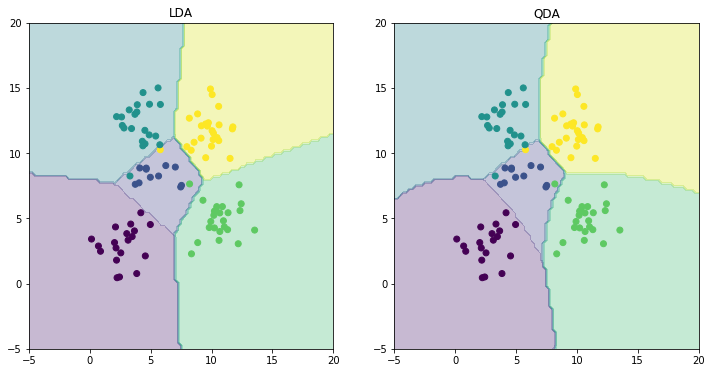

In [19]:
# plotting boundaries

x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest[:,0])
plt.title('LDA')
plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest[:,0])
plt.title('QDA')
plt.show()

In [20]:
# Problem 2
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

# add intercept
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(X,y)
mle = testOLERegression(w,Xtest,ytest)

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))

MSE without intercept 106775.361554
MSE with intercept 3707.84018128


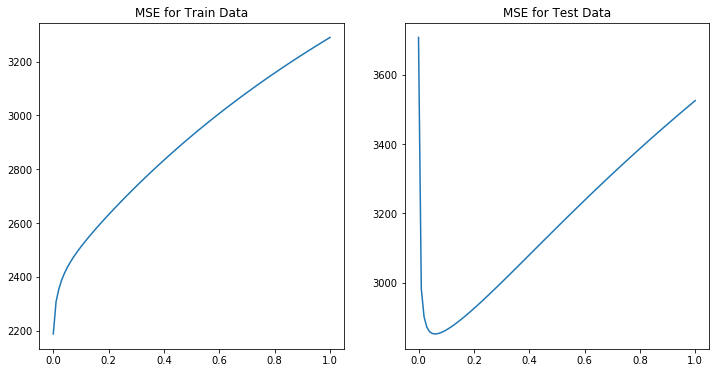

In [21]:
# Problem 3
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')

plt.show()

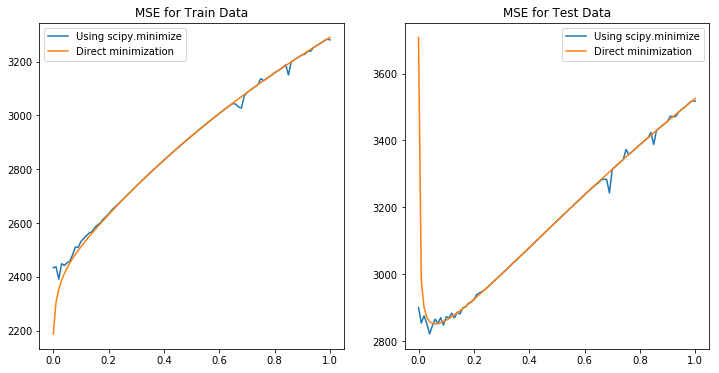

In [22]:
# Problem 4
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 20}    # Preferred value.                                                
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])
plt.show()


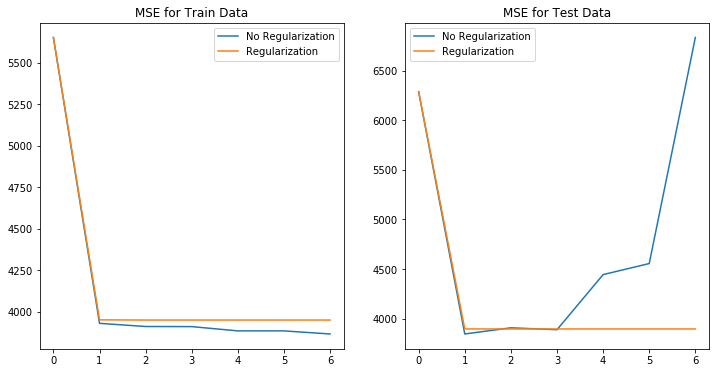

In [27]:
# Problem 5
pmax = 7
#lambda_opt = 0 # REPLACE THIS WITH lambda_opt estimated from Problem 3
lambda_opt = lambdas[np.argmin(mses3)]
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses5_train)
plt.title('MSE for Train Data')
plt.legend(('No Regularization','Regularization'))

plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses5)
plt.title('MSE for Test Data')
plt.legend(('No Regularization','Regularization'))
plt.show()
